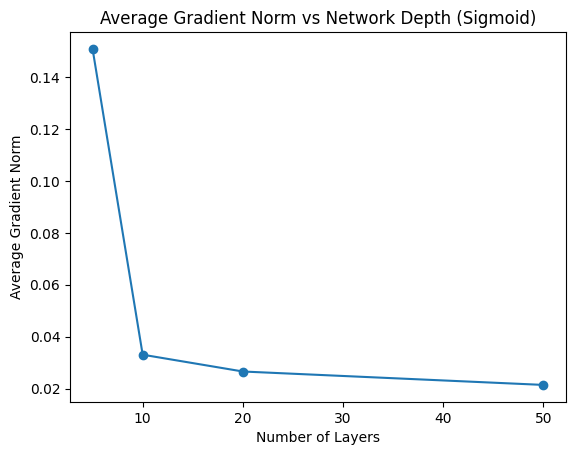

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class DeepNet(nn.Module):
    def __init__(self, n_layers, n_units):
        super().__init__()
        layers = []
        layers.append(nn.Linear(1, n_units))
        layers.append(nn.Sigmoid())
        for _ in range(n_layers-1):
            layers.append(nn.Linear(n_units, n_units))
            layers.append(nn.Sigmoid())
        layers.append(nn.Linear(n_units, 1))
        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)

x = torch.tensor([[1.0]])
y = torch.tensor([[0.0]])


layer_counts = [5, 10, 20, 50]
grad_norms = []

for n_layers in layer_counts:
    net = DeepNet(n_layers, n_units=10)
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
    

    output = net(x)
    loss = criterion(output, y)
    

    optimizer.zero_grad()
    loss.backward()
    
    
    norms = [p.grad.norm().item() for p in net.parameters() if p.grad is not None]
    grad_norms.append(sum(norms)/len(norms))

plt.plot(layer_counts, grad_norms, marker='o')
plt.title("Average Gradient Norm vs Network Depth (Sigmoid)")
plt.xlabel("Number of Layers")
plt.ylabel("Average Gradient Norm")
plt.show()